In [52]:
import os
from glob import glob

import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt

import config

In [53]:
droot = f"{config.project_tmpdir}/simulation-data/MIROC4-ACTM_T42"

path = f"{droot}/{obspack_files['mlo'].replace('.nc', '.txt')[4:]}"
print(path)
df = pd.read_csv(path, delim_whitespace=True, header=1, na_values=-599.0000)
df = df.rename({'Year': 'year', 'MM': 'month', 'DD': 'day', 'HH': 'hour', 'MI': 'minute'}, axis=1)

df['time'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.set_index('time')
df = df.dropna()
df

/glade/work/mclong/sno-analysis/simulation-data/MIROC4-ACTM_T42/mlo_surface-flask_4_representative.txt


,year,month,day,hour,minute,IS,DoY,UTC,Obs_Lat,Obs_Lon,...,co2_oco2mip,co2_cesm,co2_somffn,n2_cesm,n2_era,o2_gridfed,o2_cesm,o2_gk01r16,CO2actm_gc3t,CO2obs
time,,,,,,,,,,,,,,,,,,,,,
2005-01-13,2005,1,13,20,15,0,13,72900,19.54,-155.58,...,454.0637,378.2871,388.3289,387.4094,407.9507,317.1395,410.4074,399.3914,377.6886,379.0562
2005-01-26,2005,1,26,19,18,0,26,69480,19.54,-155.58,...,454.1545,378.2119,388.2983,387.2119,407.7964,316.9838,410.1355,399.3233,378.0770,379.0462
2005-02-09,2005,2,9,19,18,0,40,69480,19.54,-155.58,...,454.1532,378.1767,388.3025,387.3268,407.9832,316.9514,410.1879,399.5621,378.4745,379.4258
2005-02-23,2005,2,23,19,24,0,54,69840,19.54,-155.58,...,455.4733,377.9167,388.0579,385.9668,406.7606,315.0936,408.3562,398.1825,380.7654,381.2137
2005-03-09,2005,3,9,19,26,0,68,69960,19.54,-155.58,...,454.7078,377.9903,388.1843,387.3312,408.0640,316.2118,410.0521,399.6392,379.8591,379.5557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17,2020,11,17,18,40,0,322,67200,19.54,-155.58,...,522.8098,356.3705,372.0542,378.8089,411.1744,222.9241,420.2062,399.9797,413.0880,412.3427
2020-11-24,2020,11,24,19,48,0,329,71280,19.54,-155.58,...,523.4351,356.3481,371.9758,378.8485,411.1597,222.1142,420.3813,399.9674,413.4295,413.7796
2020-12-01,2020,12,1,19,8,0,336,68880,19.54,-155.58,...,524.4396,356.2646,371.8552,378.5694,410.8670,220.8502,420.3552,399.6659,414.7675,413.8095


In [48]:
ds = df.to_xarray()
ds

<xarray.Dataset>
Dimensions:       (time: 975)
Coordinates:
  * time          (time) datetime64[ns] 1991-01-19 1991-04-04 ... 2020-12-22
Data variables: (12/23)
    year          (time) int64 1991 1991 1991 1991 1991 ... 2020 2020 2020 2020
    month         (time) int64 1 4 4 5 5 6 11 11 12 ... 10 11 11 11 11 12 12 12
    day           (time) int64 19 4 18 16 30 27 7 21 5 ... 28 3 10 17 24 1 15 22
    hour          (time) int64 23 19 20 19 20 19 21 21 ... 19 19 18 19 19 19 19
    minute        (time) int64 35 33 15 18 11 41 22 33 ... 13 52 40 48 8 55 57
    IS            (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    ...            ...
    n2_era        (time) float64 nan nan nan nan nan ... 411.2 410.9 410.9 410.6
    o2_gridfed    (time) float64 nan nan nan nan nan ... 222.1 220.9 222.5 221.3
    o2_cesm       (time) float64 nan nan nan nan nan ... 420.4 420.4 420.1 420.0
    o2_gk01r16    (time) float64 nan nan nan nan nan ... 400.0 399.7 399.7 399.4
    CO2actm_gc3t  (time) float64 -3.669e+03 -3.669e+03 ... 413.9 414.9
    CO2obs        (time) float64 356.2 357.9 358.8 359.9 ... 413.8 413.7 414.2

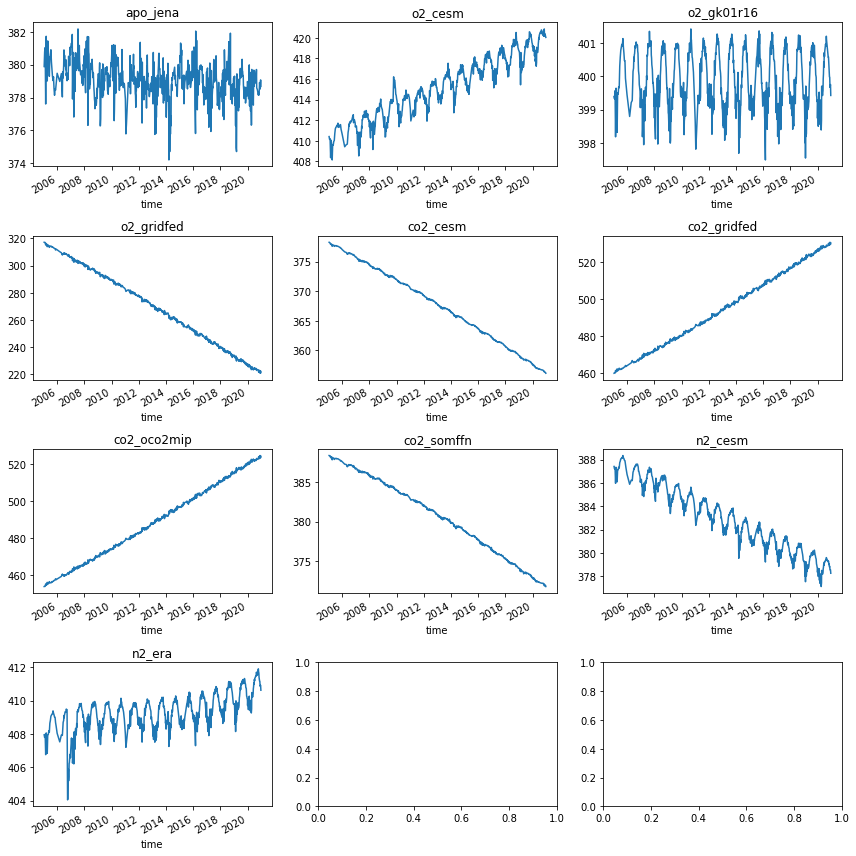

In [62]:
sno_vars = [
    'apo_jena', 
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'co2_somffn', 
    'n2_cesm', 
    'n2_era', 
]

n_plots = len(sno_vars)
ncol = int(np.sqrt(n_plots))
nrow = int(((n_plots / ncol) + n_plots % ncol))
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    df[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, n_plots):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()
    